In [62]:
import numpy as np

x = 0.1
points = [-0.4, -0.1, 0.2, 0.5, 0.8]
values = [1.9823, 1.6710, 1.3694, 1.0472, 0.64350] #TODO read file

In [63]:
#progonka
def tma_running(matrix, vec_ans, order):
    a, b, c = zip(*matrix)
    p = [-c[0] / b[0]]
    q = [vec_ans[0] / b[0]]
    x = [0] * (order + 1)
    for i in range(1, order):
        p.append(-c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((vec_ans[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))
    for i in reversed(range(order)):
        x[i] = p[i] * x[i + 1] + q[i]
    x.pop(-1)
    return x

In [126]:
def spline_interpolation(points, values, x):
    size = len(points)
    h = [points[i] - points[i - 1] for i in range(1, size)]
    mtrx = [[0, 2 * (h[0] + h[1]), h[1]]]                                             #a1b1 0 0
    b = [3 *((values[2] - values[1]) / h[1] - (values[1] - values[0]) / h[0])]        #c1a2b2 0
                                                                                      # 0c2a3b3
                                                                                      # 0 0c3a3

    for i in range(1, size - 3):
        mtrx.append([h[i], 2 * (h[i] + h[i + 1]), h[i + 1]])
        b.append(3 * ((values[i + 2] - values[i + 1]) / h[i + 1] - (values[i + 1] - values[i]) / h[i]))
    mtrx.append([h[-2], 2 * (h[-2] + h[-1]), 0])
    b.append(3 * ((values[-1] - values[-2]) / h[-1] - (values[-2] - values[-3]) / h[-2]))
    
    
    #find a, b, c, d
    
    c = tma_running(mtrx, b, size - 2)
    a = []
    b = []
    d = []
    c.insert(0, 0)
    for i in range(1, size):
        a.append(values[i - 1])
        if i < size - 1:
            d.append((c[i] - c[i - 1]) / (3 * h[i - 1]))
            b.append((values[i] - values[i - 1]) / h[i - 1] -
                     h[i - 1] * (c[i] + 2 * c[i - 1]) / 3)
    b.append((values[-1] - values[-2]) / h[-1] - 2 * h[-1] * c[-1] / 3)
    d.append(-c[-1] / (3 * h[-1]))
    
    i = find_interval(points, x)
    res = a[i] + b[i] * (x - points[i]) + c[i]*((x-points[i])**2) + d[i]*((x-points[i])**3)
    return a, b, c, d
    

In [87]:
def find_interval(points, x):
    k = 0
    for i, j in zip(points, points[1:]):
        if i <= x <= j:
            return k
        k += 1

In [155]:
coef = spline_interpolation(points, values, x)

def draw_graphic(points):
    x1 = np.linspace(points[0], points[-1], 100)
    y1 = []
    a, b, c, d = coef
    for p in x1:
        k = 0
        for i, j in zip(points, points[1:]):
            if i <= p <= j:
                y1.append(a[k] + b[k] * (p - points[k]) + c[k]*((p-points[k])**2) + d[k]*((p-points[k])**3))
            k += 1

    plt.plot(x1, y1, color='b')
    plt.plot(points, values, 'or')
    plt.xlabel('X')
    plt.ylabel('Y')
    #plt.legend(['y = x^3', 'y = 2x - x^2 + 1'], loc='upper left')
    plt.grid(True)
    #plt.savefig('Spline interpolation')
    plt.show()

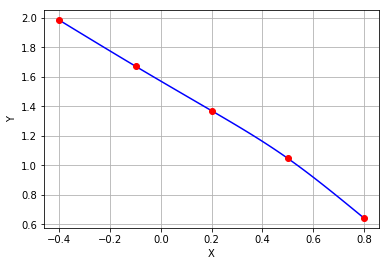

In [156]:
draw_graphic(points)

In [6]:
find_interval(points, preset_x)

1.4694391534391535